In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import os
from AB_testing_training import df_ab_testing

sns.set_style(style="darkgrid")
warnings.filterwarnings(action="ignore")
%matplotlib inline



Probability In Control Group: 0.2
Probability In The Experimental Group: 0.40
Probability Of Pooled Hat : 0.000030140000000
Probability Of Pooled Variance: 0.000000006027818
standard Error (Standard deviation of the sample) : 0.00008
level of significant : 0.05
Two tail alpha: 0.025
p-value: 0.000000
test test: -2612.0884194119753


In [3]:
print(df_ab_testing.shape)
df_ab_testing.info()

(20000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   click      20000 non-null  int32 
 1   group      20000 non-null  object
 2   timestamp  20000 non-null  object
dtypes: int32(1), object(2)
memory usage: 390.8+ KB


In [4]:
from copy import deepcopy
from pandas import DataFrame
    
df: DataFrame = deepcopy(x=df_ab_testing)
df.groupby(by="group").sum(numeric_only="click")

,click
group,
con,2000
exp,4028


In [5]:
df.describe()

,click
count,20000.000000
mean,0.301400
std,0.458878
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


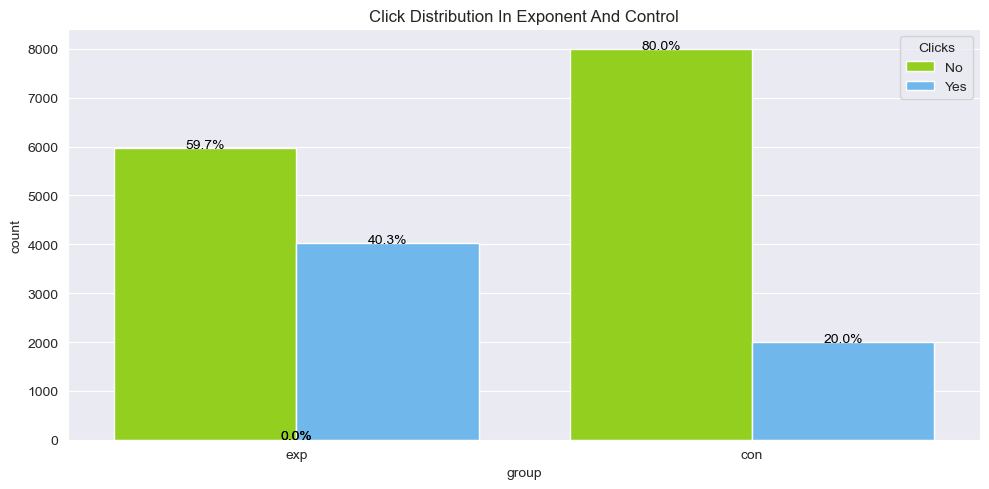

In [26]:
from typing import Literal


palette = {0: "#9BEC00", 1:"#5BBCFF"}
plt.figure(figsize=(10,5))

ax = sns.countplot(data=df, x="group", hue="click", palette=palette)
plt.title(label="click distribution in exponent and control".title())

plt.legend(title="clicks".title(), labels=["No", "Yes"])
plt.tight_layout()

# total size of the group
group_count = df.groupby("group").size()
group_click_count = df.groupby(["group", "click"]).size().reset_index(name="count")

for p in ax.patches:
    height = p.get_height()
    group: Literal['exp'] | Literal['con'] = "exp" if p.get_x() < 0.5 else "con"
    click: Literal[1] | Literal[0] = 1 if p.get_x() > 0.5 else 0
    total: np.int64 = group_count.loc[group]
    percentage = 100 * height / total
    ax.text(p.get_x() + p.get_width() / 2. , height + 7, f"{percentage:.1f}%", ha="center", color="black", fontsize=10)
plt.show()

## since the hypothesis is :
### null hypothesis :hypothesized (population mean) = alternative hypothesis: hypothesized (population mean)
### alternative hypothesis :hypothesized (population mean) != null hypothesis : hypothesized (population mean)
#### therefore we have two tail alpha

**since the p_value = 0 , z_test = -31.3 and z_critical = 1.96**

- z_test is from anther distribution and in the rejection area so reject the null hypothesis


In [55]:
alpha = 0.05
print("the level of significance is:", alpha)

delta = 0.1
print("minimum detectable effect is:", delta)

z_critical: np.float64 = np.round(a=stats.norm.ppf(q=1 - alpha / 2) ,decimals=2)

N_con = df[df["group"] == "con"].count().loc["click"]
N_exp = df[df["group"] == "exp"].count().loc["click"]

x_con: np.int32 = df.groupby(by="group")["click"].sum().loc["con"]
x_exp: np.int32 = df.groupby(by="group")["click"].sum().loc["exp"]

p_con_hat = x_con / N_con
p_exp_hat = x_exp / N_exp

# accumulate the estimate of the pool 
p_pooled_hat =(x_con + x_exp) / (N_con + N_exp)

# estimate the pooled variance
pooled_variance = p_pooled_hat * (1 - p_pooled_hat) * ((1 / N_con) + (1 / N_exp))

print(f"pooled estimate : {p_pooled_hat}\npooled variance: {pooled_variance:9f}")

SE = np.sqrt(pooled_variance)
z_test = (p_con_hat - p_exp_hat) / SE
print(round(z_test,1))

p_value = stats.norm.sf(np.abs(z_test)) * 2
print(f"{p_value:.9f}")

the level of significance is: 0.05
minimum detectable effect is: 0.1
pooled estimate : 0.3014
pooled variance:  0.000042
-31.3
0.000000000
